In [1]:
 import os
print(os.listdir())



['.config', 'r4_improper.csv', 'r8_proper.csv', 'r8_improper.csv', 'r4_proper.csv', 'r7_proper.csv', 'r9_improper.csv', 'r10_proper.csv', 'r5_improper.csv', 'r11_proper.csv', 'r9_proper.csv', 'r12_proper.csv', 'r7_improper.csv', 'r5_proper.csv', 'r6_proper.csv', 'r11_improper.csv', 'r13_proper.csv', 'r10_improper.csv', 'r6_improper.csv', 'r12_improper.csv', 'r13_improper.csv', 'sample_data']


In [2]:
import pandas as pd
import os

# List your files
proper_files = [f"r{i}_proper.csv" for i in range(4, 14)]
improper_files = [f"r{i}_improper.csv" for i in range(4, 14)]

# Function to load and label
def load_and_label(file_list, label):
    dfs = []
    for file in file_list:
        if os.path.exists(file):
            df = pd.read_csv(file)
            df['label'] = label
            dfs.append(df)
        else:
            print(f"⚠️ File not found: {file}")
    return dfs

# Load proper (label = 1) and improper (label = 0)
proper_dfs = load_and_label(proper_files, 1)
improper_dfs = load_and_label(improper_files, 0)

# Combine everything
all_data = pd.concat(proper_dfs + improper_dfs, ignore_index=True)

# Shuffle rows (important for training)
all_data = all_data.sample(frac=1).reset_index(drop=True)

# Save combined CSV
all_data.to_csv("combined_labeled_data.csv", index=False)

print("✅ All data combined and labeled. Saved as 'combined_labeled_data.csv'.")


✅ All data combined and labeled. Saved as 'combined_labeled_data.csv'.


In [3]:
import pandas as pd

# Load combined data
df = pd.read_csv("combined_labeled_data.csv")  # replace with your filename
print(df.head())
print(df.info())
print(df['label'].value_counts())



             timestamp       ax1       ay1       az1       ax2       ay2  \
0  2025-04-14 15:32:08 -0.152832 -0.965820  0.121094 -0.169434 -0.980957   
1  2025-04-14 15:56:37 -0.427246  0.054199 -0.918457 -0.669922  0.174805   
2  2025-04-14 15:34:01 -0.101563  0.010254 -0.973633 -0.170410  0.008301   
3  2025-04-14 15:44:44 -0.269043 -0.948730  0.044434 -0.273926 -0.891602   
4  2025-04-14 15:56:34 -0.252441 -0.893066  0.334473 -0.236816 -0.937500   

        az2        gx1       gy1       gz1        gx2        gy2       gz2  \
0  0.083984   1.403809 -9.765625  1.464844  -1.953125   3.662109 -0.732422   
1 -0.874023  13.061520 -0.488281  2.319336  24.597170 -24.353030  0.000000   
2 -1.048340  -0.671387 -0.366211  4.150391  -0.976563   5.371094  1.770020   
3 -0.361816  30.944820 -7.446289  0.061035  28.564450 -11.169430 -9.765625   
4  0.239258   7.324219  3.417969 -0.244141  -5.920410  -2.136230 -8.850098   

   relative_angle  delta_gyro_y  label  
0        2.376935    -13.427730  

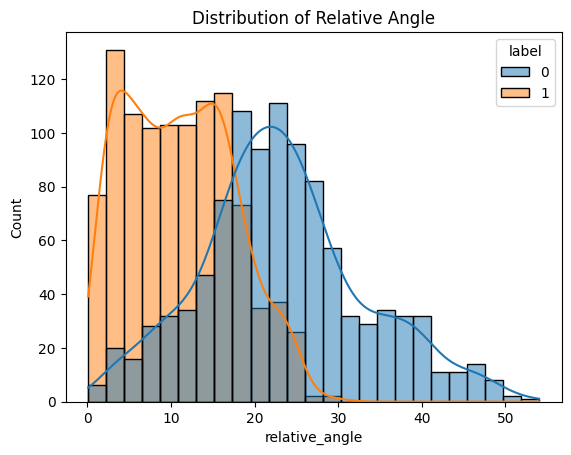

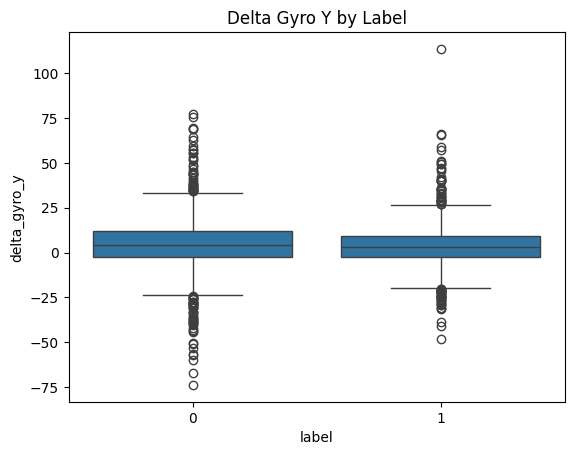

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check distribution of relative angle
sns.histplot(data=df, x="relative_angle", hue="label", kde=True)
plt.title("Distribution of Relative Angle")
plt.show()

# Compare delta_gyro_y across labels
sns.boxplot(x="label", y="delta_gyro_y", data=df)
plt.title("Delta Gyro Y by Label")
plt.show()


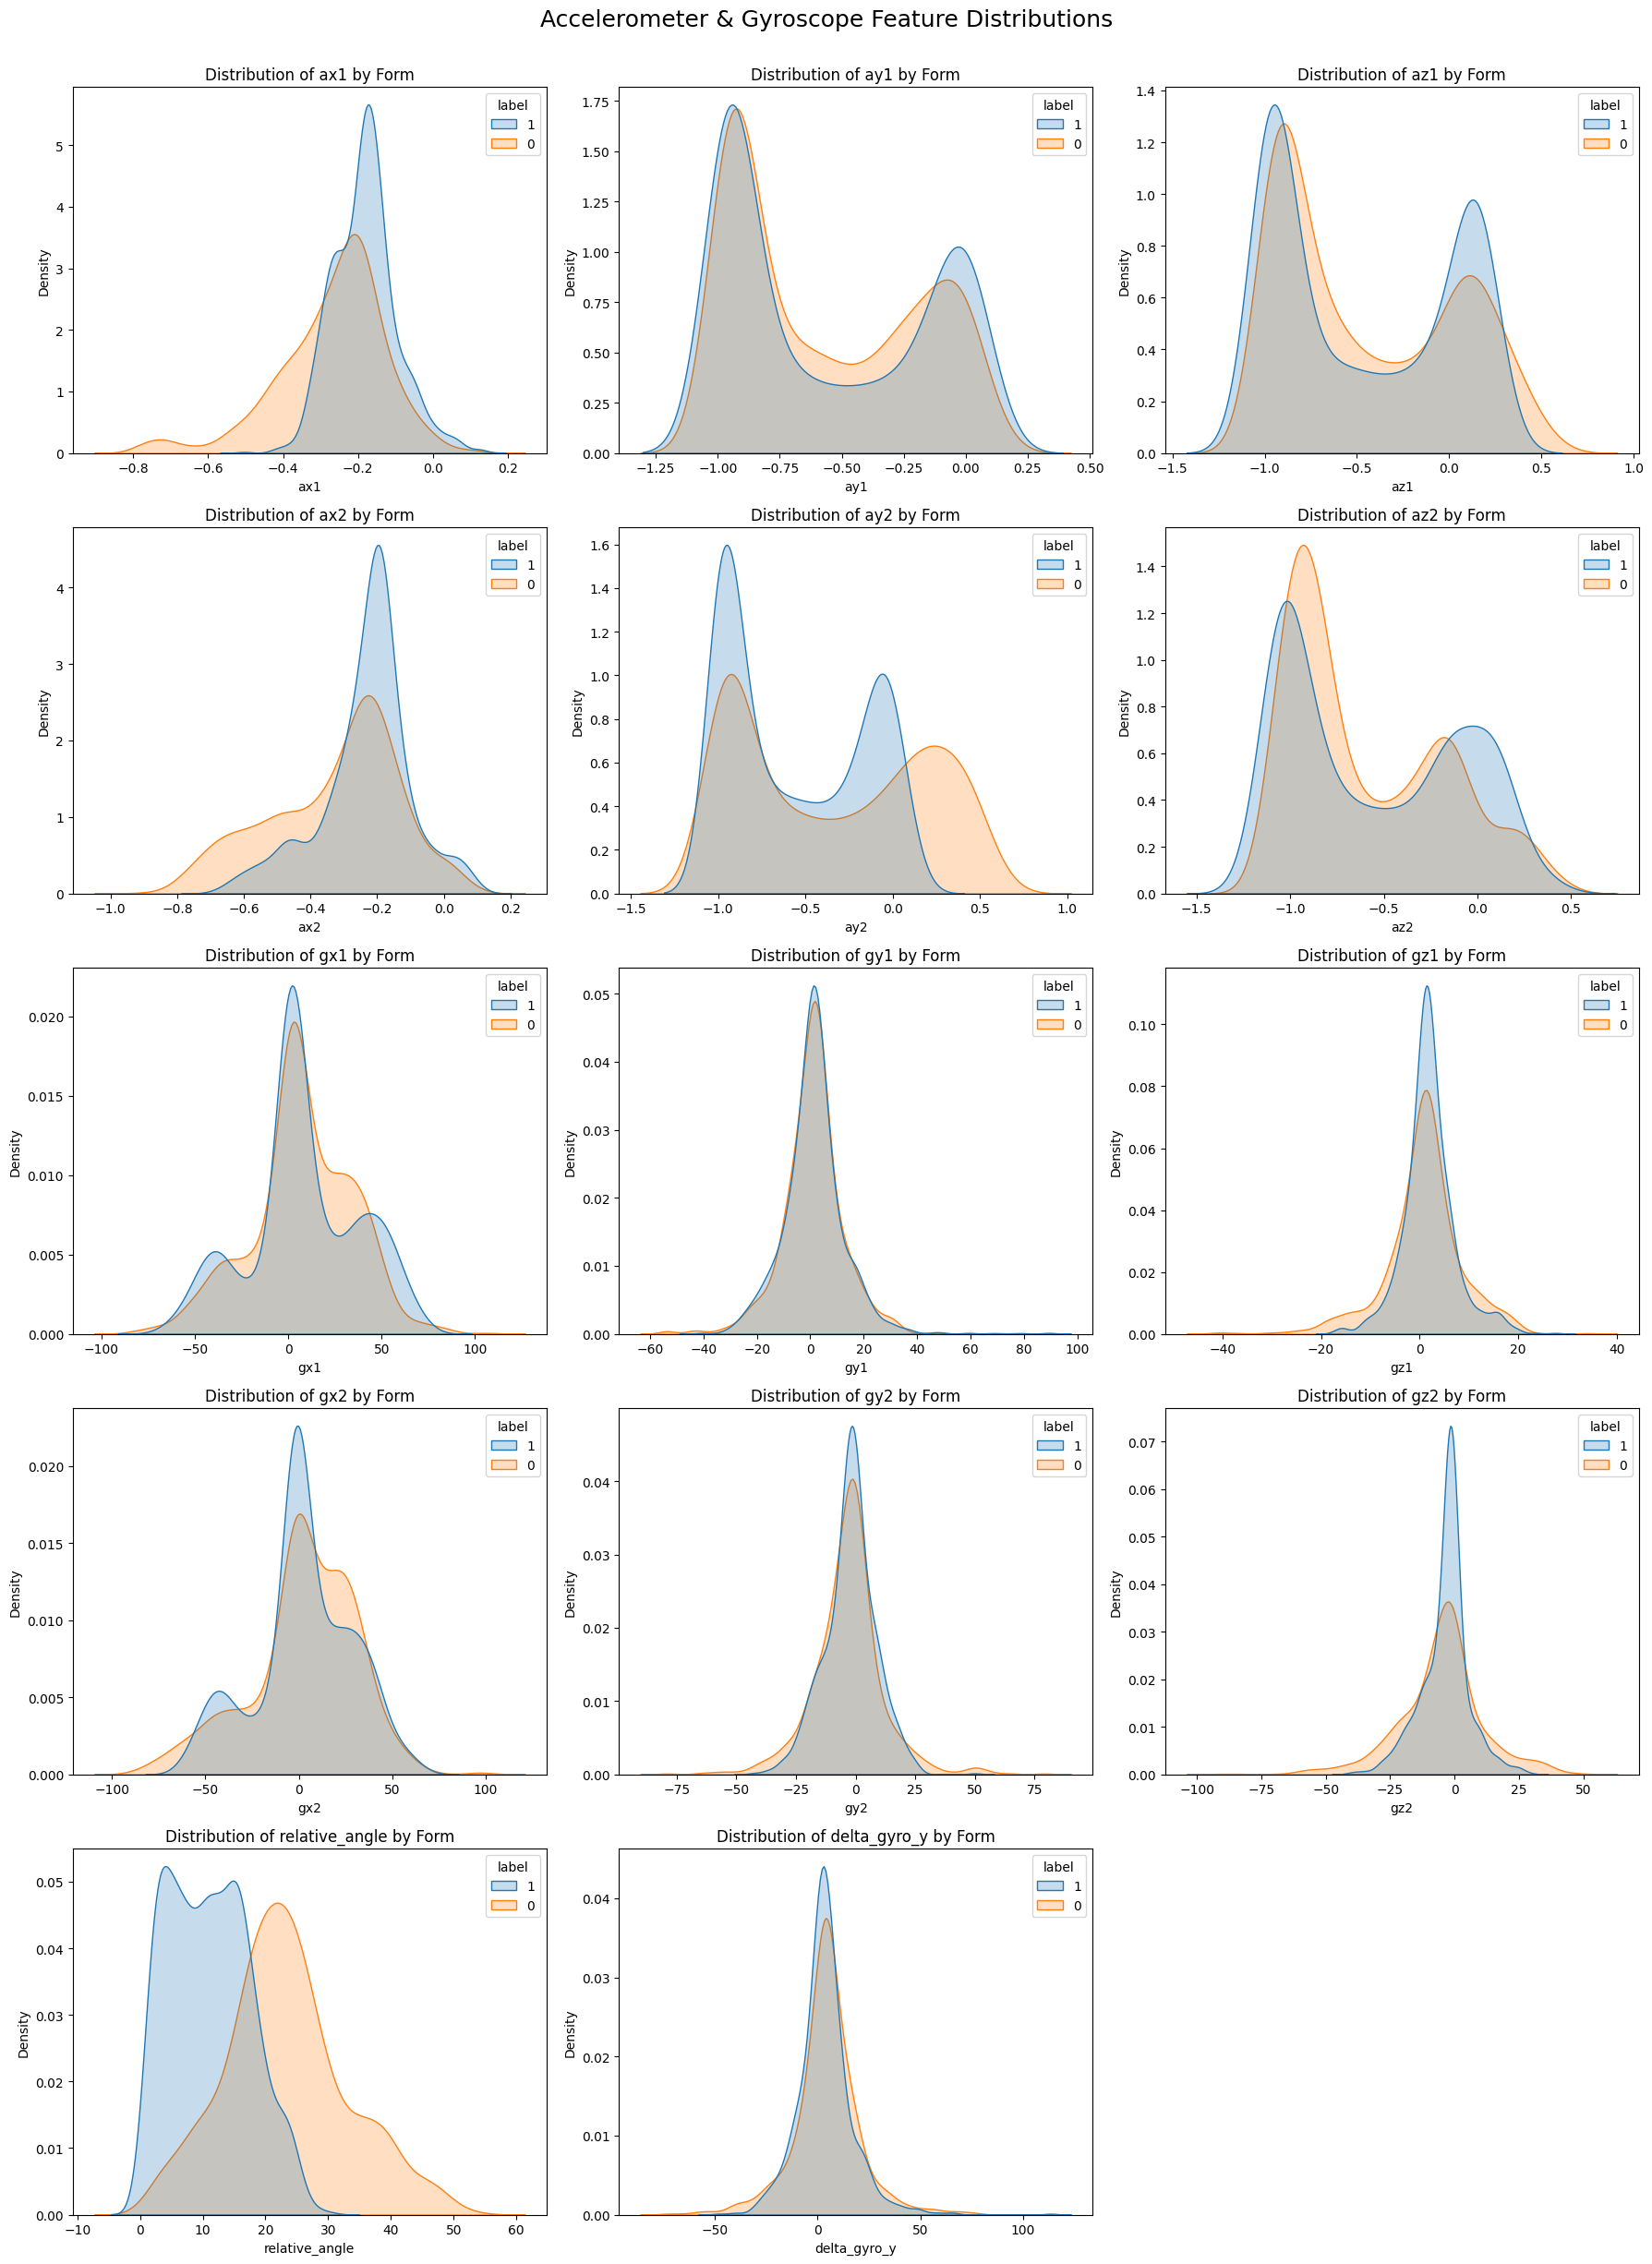

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the combined labeled dataset
df = pd.read_csv("combined_labeled_data.csv")

# Convert label to categorical if needed
df['label'] = df['label'].astype(str)

# List of sensor features to plot
features = [
    'ax1', 'ay1', 'az1',  # IMU1 Accelerometer
    'ax2', 'ay2', 'az2',  # IMU2 Accelerometer
    'gx1', 'gy1', 'gz1',  # IMU1 Gyroscope
    'gx2', 'gy2', 'gz2',  # IMU2 Gyroscope
    'relative_angle', 'delta_gyro_y'
]

# Create subplots
plt.figure(figsize=(18, 24))
for i, feature in enumerate(features):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(data=df, x=feature, hue='label', fill=True, common_norm=False)
    plt.title(f'Distribution of {feature} by Form')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.tight_layout()

plt.suptitle('Accelerometer & Gyroscope Feature Distributions', fontsize=18, y=1.02)
plt.show()


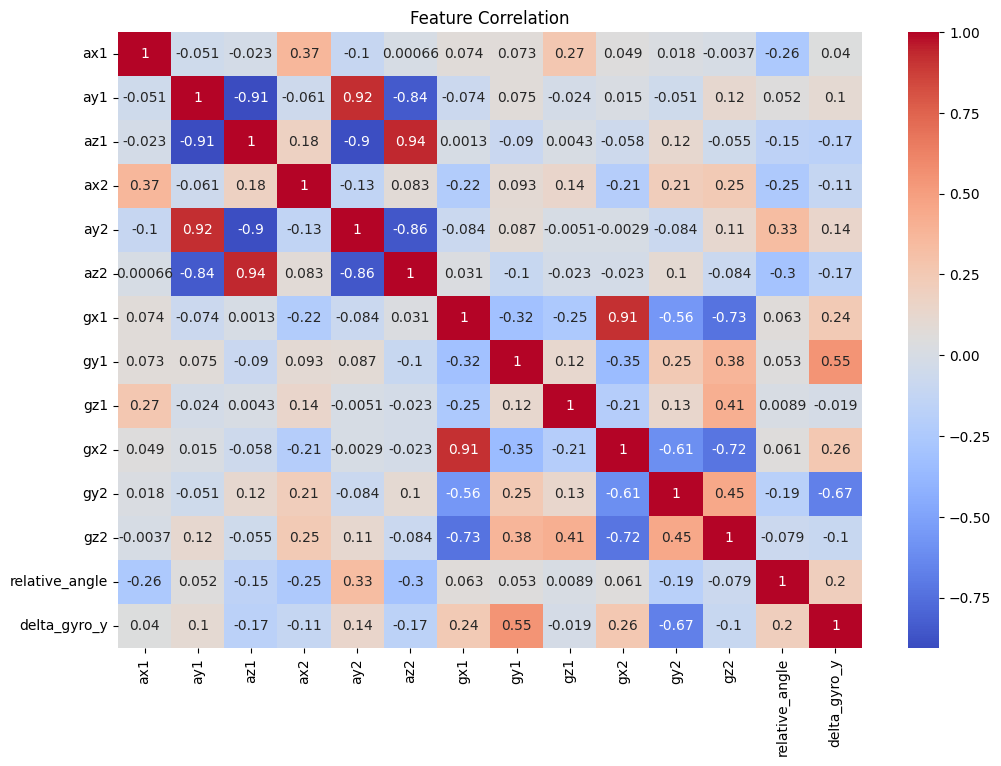

In [6]:
correlation = df.drop(columns=['timestamp', 'label']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


In [7]:
import pandas as pd
import os

# List your uploaded CSV files (update paths if needed)
proper_files = [f"r{i}_proper.csv" for i in range(4, 14)]
improper_files = [f"r{i}_improper.csv" for i in range(4, 14)]

# Load and label data
dfs = []

for file in proper_files:
    df = pd.read_csv(file)
    df["label"] = "proper"
    dfs.append(df)

for file in improper_files:
    df = pd.read_csv(file)
    df["label"] = "improper"
    dfs.append(df)

# Combine
data = pd.concat(dfs, ignore_index=True)
print("Combined data shape:", data.shape)
print(data["label"].value_counts())


Combined data shape: (2037, 16)
label
proper      1025
improper    1012
Name: count, dtype: int64


In [8]:
print("Combined data shape:", data.shape)
print(data["label"].value_counts())
print(data.head())


Combined data shape: (2037, 16)
label
proper      1025
improper    1012
Name: count, dtype: int64
             timestamp       ax1       ay1       az1       ax2       ay2  \
0  2025-04-14 15:32:00 -0.204102 -0.965332  0.127441 -0.178223 -0.976563   
1  2025-04-14 15:32:01 -0.187012 -0.968750  0.143066 -0.176758 -0.970703   
2  2025-04-14 15:32:01 -0.181152 -0.969727  0.145020 -0.178223 -0.980957   
3  2025-04-14 15:32:01 -0.176758 -0.968262  0.151855 -0.176758 -0.975098   
4  2025-04-14 15:32:01 -0.185059 -0.969238  0.146484 -0.173828 -0.977539   

        az2       gx1        gy1       gz1       gx2       gy2       gz2  \
0 -0.184082  0.793457   7.873535 -0.061035 -3.601074  5.249023 -0.854492   
1 -0.200684  0.061035   4.882813  1.403809 -2.746582 -0.244141  1.098633   
2 -0.205566  1.525879   8.850098  1.281738 -3.662109  3.723145  0.061035   
3 -0.192871  1.586914  15.380860 -0.549316 -3.417969  8.728027  0.610352   
4 -0.184082  2.502441   5.798340  1.708984 -3.906250  1.464844 -0

Accuracy: 0.9166666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91       203
           1       0.89      0.95      0.92       205

    accuracy                           0.92       408
   macro avg       0.92      0.92      0.92       408
weighted avg       0.92      0.92      0.92       408



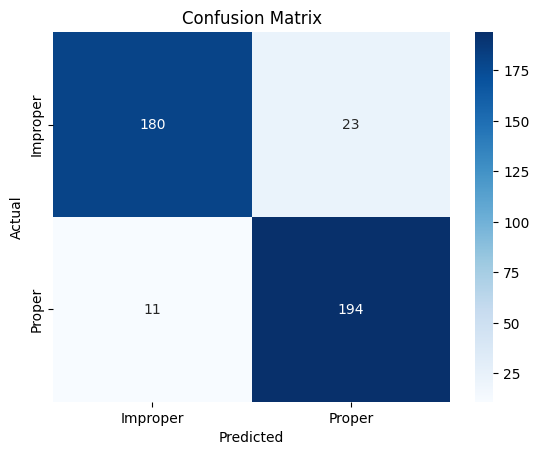

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Drop columns that shouldn't go into model
df_model = data.drop(columns=["timestamp"])

# Convert label to numeric
df_model["label"] = df_model["label"].map({"proper": 1, "improper": 0})

# Split features and label
X = df_model.drop("label", axis=1)
y = df_model["label"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Train a random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Improper", "Proper"], yticklabels=["Improper", "Proper"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


<ipython-input-10-4c85700457a5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[sorted_indices], y=feature_names[sorted_indices], palette="viridis")


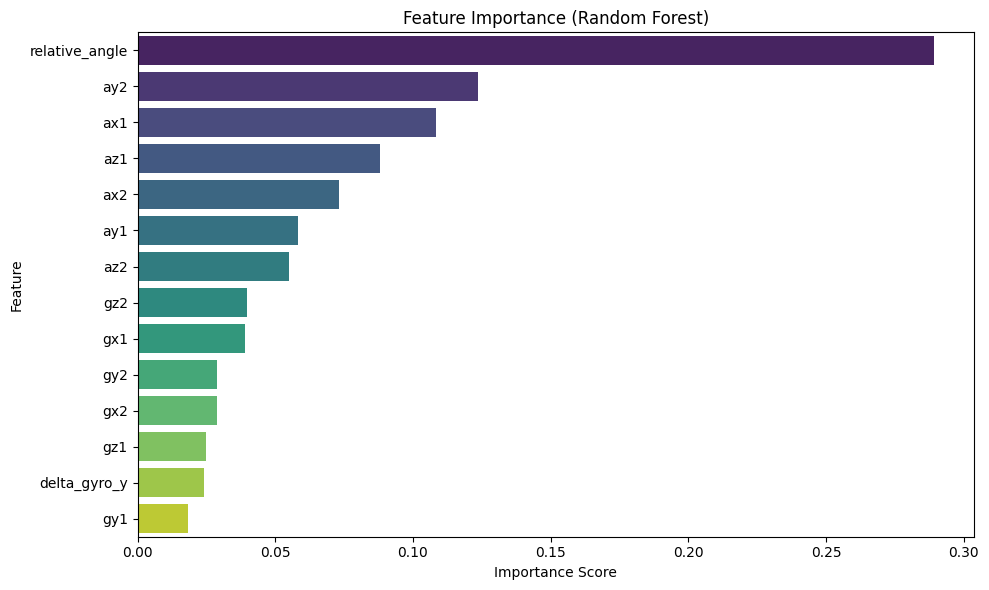

In [10]:
# Get feature importances from the model
importances = model.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_indices = importances.argsort()[::-1]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_indices], y=feature_names[sorted_indices], palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [11]:
!pip install shap


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming df is already cleaned and loaded
X = df.drop(columns=["timestamp", "label"])
y = df["label"].map({"proper": 1, "improper": 0})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [13]:
import shap
import numpy as np

# Convert to numpy if needed
X_summary = shap.utils.sample(X_train, 100)  # summarizing with 100 samples
explainer = shap.Explainer(model, X_summary)

# Compute SHAP values on test data
shap_values = explainer(X_test)


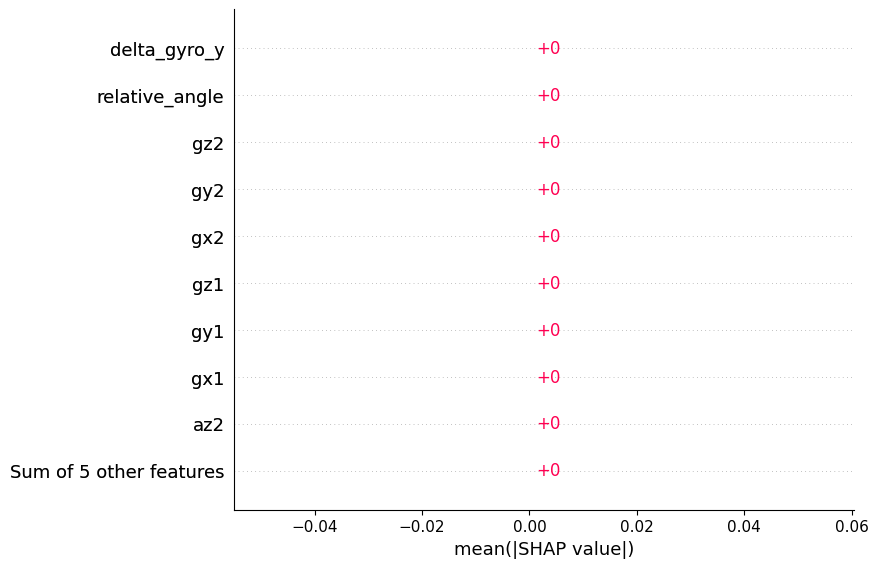

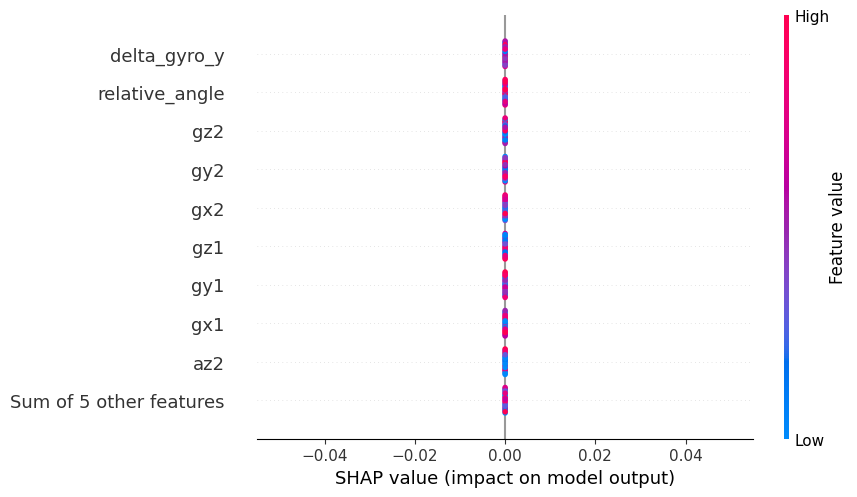

In [14]:
# Summary bar plot (global importance)
shap.plots.bar(shap_values)

# Optional: Beeswarm plot (global distribution + impact)
shap.plots.beeswarm(shap_values)


In [15]:
from sklearn.preprocessing import StandardScaler

# 1. Select numeric feature columns (exclude timestamp and label)
features = ['ax1', 'ay1', 'az1', 'ax2', 'ay2', 'az2',
            'gx1', 'gy1', 'gz1', 'gx2', 'gy2', 'gz2',
            'relative_angle', 'delta_gyro_y']

# 2. Extract feature matrix and target
X = df[features]
y = df["label"].map({"proper": 1, "improper": 0})

# 3. Initialize scaler and fit-transform
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Convert back to DataFrame for easier inspection (optional)
import pandas as pd
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

# Check few rows
X_scaled_df.head()


,ax1,ay1,az1,ax2,ay2,az2,gx1,gy1,gz1,gx2,gy2,gz2,relative_angle,delta_gyro_y
0,1.310628,-0.979492,1.197992,1.184500,-1.088341,0.650320,-0.205189,0.117125,0.201941,-0.191921,-0.053461,0.189475,1.123169,0.156317
1,1.249862,-0.974343,1.198924,1.182274,-1.090191,0.644661,-0.193486,0.280687,0.222491,-0.152092,0.072554,0.175409,1.152618,0.164320
2,1.314677,-0.978205,1.195202,1.157832,-1.087417,0.668427,-0.165399,0.327419,0.073500,-0.122884,0.026730,0.152903,1.039477,0.252357
3,1.282274,-0.982068,1.197992,1.177833,-1.094814,0.633345,-0.214551,0.056373,0.279005,-0.109607,0.118377,0.133210,1.180878,-0.075779
4,1.225564,-0.983354,1.190548,1.157832,-1.084643,0.634476,-0.106885,0.196569,0.027262,-0.077744,0.271122,0.147277,1.142105,-0.115796


In [17]:
print(y.unique())
print(y.value_counts())


[0]
label
0    111
Name: count, dtype: int64


In [18]:
print(data['label'].value_counts())


label
proper      1025
improper    1012
Name: count, dtype: int64


In [19]:
from sklearn.preprocessing import LabelEncoder

# Select features and labels
X = data.drop(['timestamp', 'label'], axis=1)
y = data['label']

# Check original label distribution
print(y.value_counts())

# Encode labels properly
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # proper => 1, improper => 0 (likely)

# Normalize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create new DataFrame with normalized features and encoded label
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df['label'] = y_encoded

# Final check
print(X_scaled_df['label'].value_counts())
print(le.classes_)  # So you know which label is 0 and which is 1


label
proper      1025
improper    1012
Name: count, dtype: int64
label
1    1025
0    1012
Name: count, dtype: int64
['improper' 'proper']


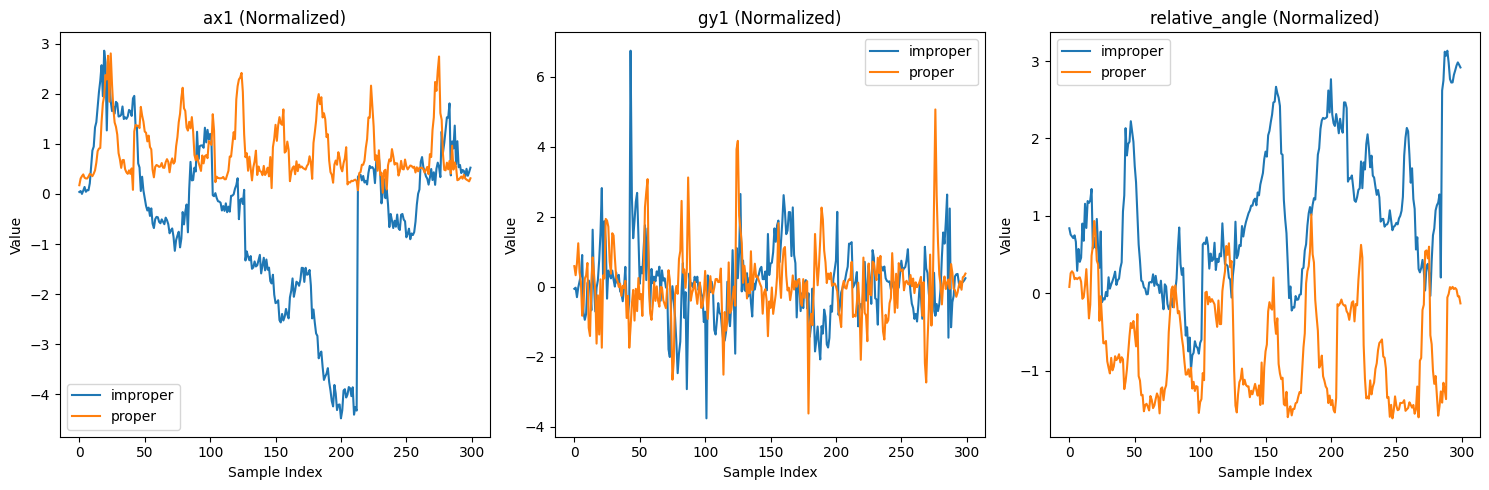

In [20]:
import matplotlib.pyplot as plt

features_to_plot = ['ax1', 'gy1', 'relative_angle']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(features_to_plot):
    plt.subplot(1, len(features_to_plot), i+1)
    for label, label_name in zip([0, 1], le.classes_):  # use decoded names
        subset = X_scaled_df[X_scaled_df['label'] == label]
        plt.plot(subset[feature].values[:300], label=label_name)

    plt.title(f"{feature} (Normalized)")
    plt.xlabel("Sample Index")
    plt.ylabel("Value")
    plt.legend()

plt.tight_layout()
plt.show()


LSTM MODEL

In [21]:
import numpy as np

# Convert DataFrame to NumPy arrays
features = X_scaled_df.drop("label", axis=1).values
labels = X_scaled_df["label"].values

sequence_length = 30  # You can adjust this

X_seq = []
y_seq = []

for i in range(len(features) - sequence_length):
    X_seq.append(features[i:i+sequence_length])
    y_seq.append(labels[i+sequence_length])  # Label at the end of sequence

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

print("Sequence shape:", X_seq.shape)  # (samples, timesteps, features)
print("Label shape:", y_seq.shape)


Sequence shape: (2007, 30, 14)
Label shape: (2007,)


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42, stratify=y_seq)


In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │        20,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,185 (129.63 KB)

 Trainable params: 33,185 (129.63 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32,
                    validation_data=(X_test, y_test))


Epoch 1/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.7640 - loss: 0.5336 - val_accuracy: 0.9428 - val_loss: 0.1765
Epoch 2/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9640 - loss: 0.1259 - val_accuracy: 0.9751 - val_loss: 0.0792
Epoch 3/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9806 - loss: 0.0579 - val_accuracy: 0.9801 - val_loss: 0.0569
Epoch 4/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.9890 - loss: 0.0345 - val_accuracy: 0.9925 - val_loss: 0.0352
Epoch 5/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.9903 - loss: 0.0302 - val_accuracy: 0.9950 - val_loss: 0.0179
Epoch 6/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.9960 - loss: 0.0117 - val_accuracy: 0.9950 - val_loss: 0.0118
Epoch 7/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9989 - loss: 0.0066 - val_accuracy: 0.9975 - val_loss: 0.0096
Epoch 8/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9980 - loss: 0.0101 - val_accuracy: 0.9751 - 

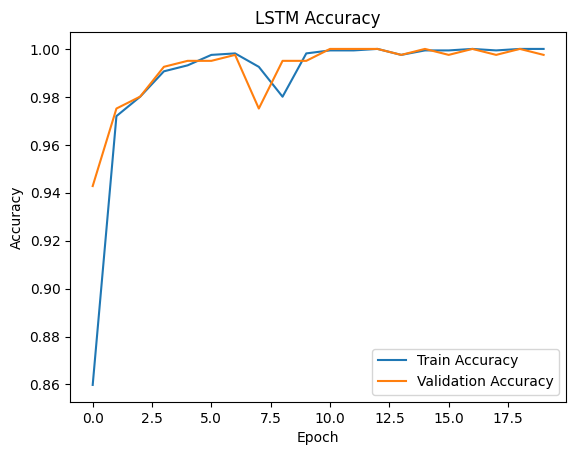

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("LSTM Accuracy")
plt.show()


In [26]:
# Predict probabilities
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary labels
y_pred = (y_pred_prob > 0.5).astype("int32")


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


Classification Report:

              precision    recall  f1-score   support

    Improper       1.00      1.00      1.00       203
      Proper       1.00      0.99      1.00       199

    accuracy                           1.00       402
   macro avg       1.00      1.00      1.00       402
weighted avg       1.00      1.00      1.00       402



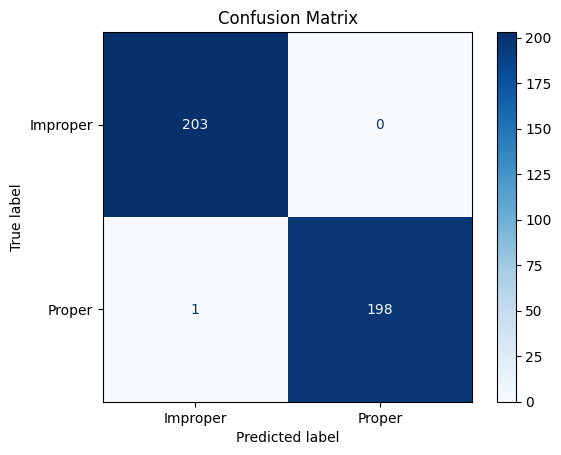

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Improper', 'Proper']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Improper', 'Proper'])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


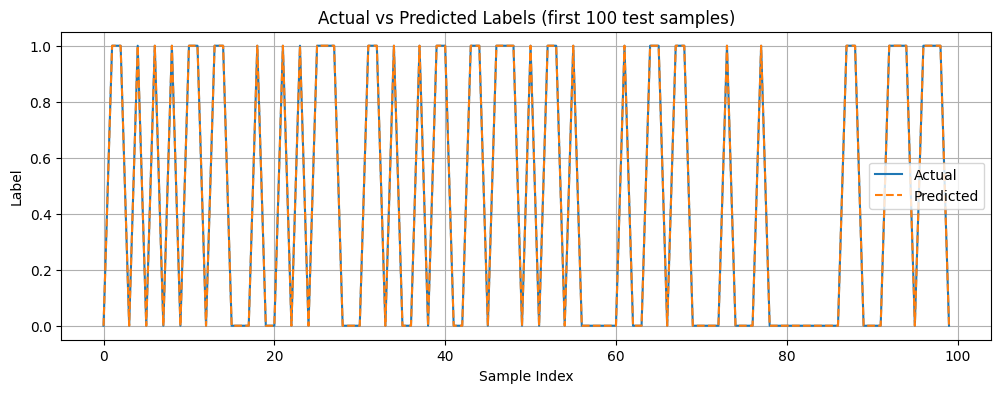

In [28]:
plt.figure(figsize=(12, 4))
plt.plot(y_test[:100], label="Actual")
plt.plot(y_pred[:100], label="Predicted", linestyle="--")
plt.legend()
plt.title("Actual vs Predicted Labels (first 100 test samples)")
plt.xlabel("Sample Index")
plt.ylabel("Label")
plt.grid(True)
plt.show()


In [29]:
from tensorflow.keras.layers import Bidirectional
model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [31]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_data=(X_test, y_test), callbacks=[early_stop])


Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.7283 - loss: 0.5376 - val_accuracy: 0.9552 - val_loss: 0.1543
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9711 - loss: 0.0968 - val_accuracy: 0.9801 - val_loss: 0.0610
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9911 - loss: 0.0350 - val_accuracy: 0.9950 - val_loss: 0.0212
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9922 - loss: 0.0355 - val_accuracy: 0.9925 - val_loss: 0.0294
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9899 - loss: 0.0278 - val_accuracy: 0.9950 - val_loss: 0.0149
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9971 - loss: 0.0137 - val_accuracy: 0.9975 - val_loss: 0.0097
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9983 - loss: 0.0081 - val_accuracy: 0.9975 - val_loss: 0.0068
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9979 - loss: 0.0082 - val_accuracy: 0.9975 - v

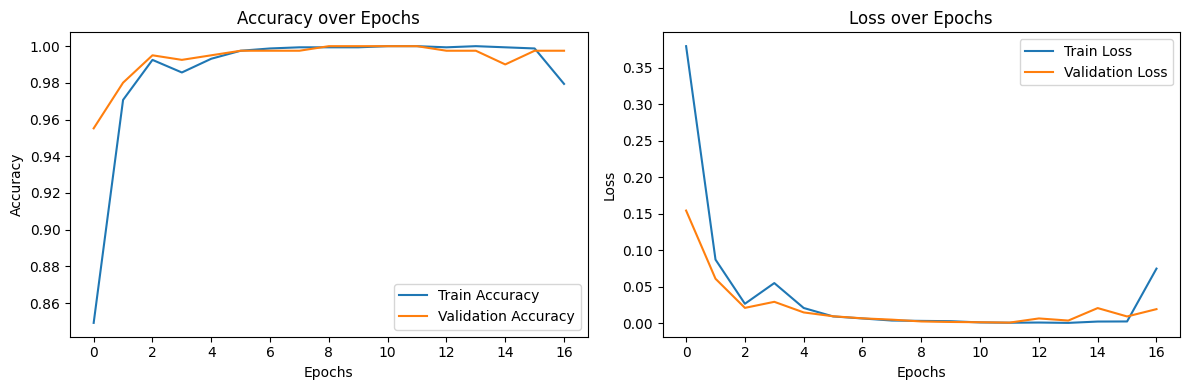

In [32]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.tight_layout()
plt.show()


In [36]:
from sklearn.model_selection import train_test_split

# Assuming you already have X_train and y_train:
X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Then retrain using:
model.fit(X_train_new, y_train_new, validation_data=(X_val, y_val), epochs=50, callbacks=[early_stop])


Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9967 - loss: 0.0131 - val_accuracy: 0.9938 - val_loss: 0.0209
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.9918 - loss: 0.0242 - val_accuracy: 0.9969 - val_loss: 0.0137
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.9950 - loss: 0.0138 - val_accuracy: 1.0000 - val_loss: 0.0036
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 9.0791e-04
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9999 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.9999 - loss: 0.0026 - val_accuracy: 1.0000 - val_loss: 7.0978e-04
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 1.0000 - loss: 5.7960e-04 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 1.0000 - loss: 5.2516e-04 - val_accu

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step


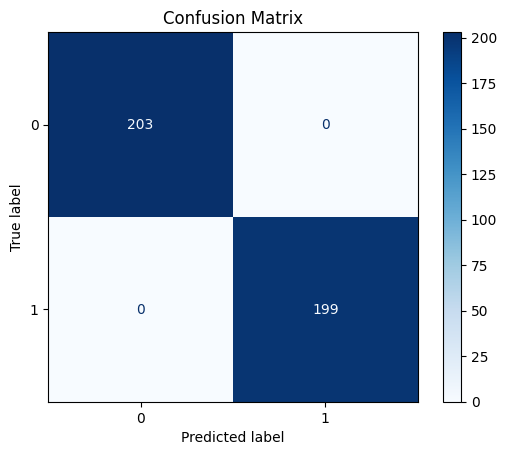

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       203
           1       1.00      1.00      1.00       199

    accuracy                           1.00       402
   macro avg       1.00      1.00      1.00       402
weighted avg       1.00      1.00      1.00       402



In [33]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predict on test set
y_pred_probs = model.predict(X_test)
y_pred_classes = (y_pred_probs > 0.5).astype("int32")  # for binary classification

# Confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Report
print(classification_report(y_test, y_pred_classes))


In [35]:
print(classification_report(y_test, y_pred_classes))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       203
           1       1.00      1.00      1.00       199

    accuracy                           1.00       402
   macro avg       1.00      1.00      1.00       402
weighted avg       1.00      1.00      1.00       402



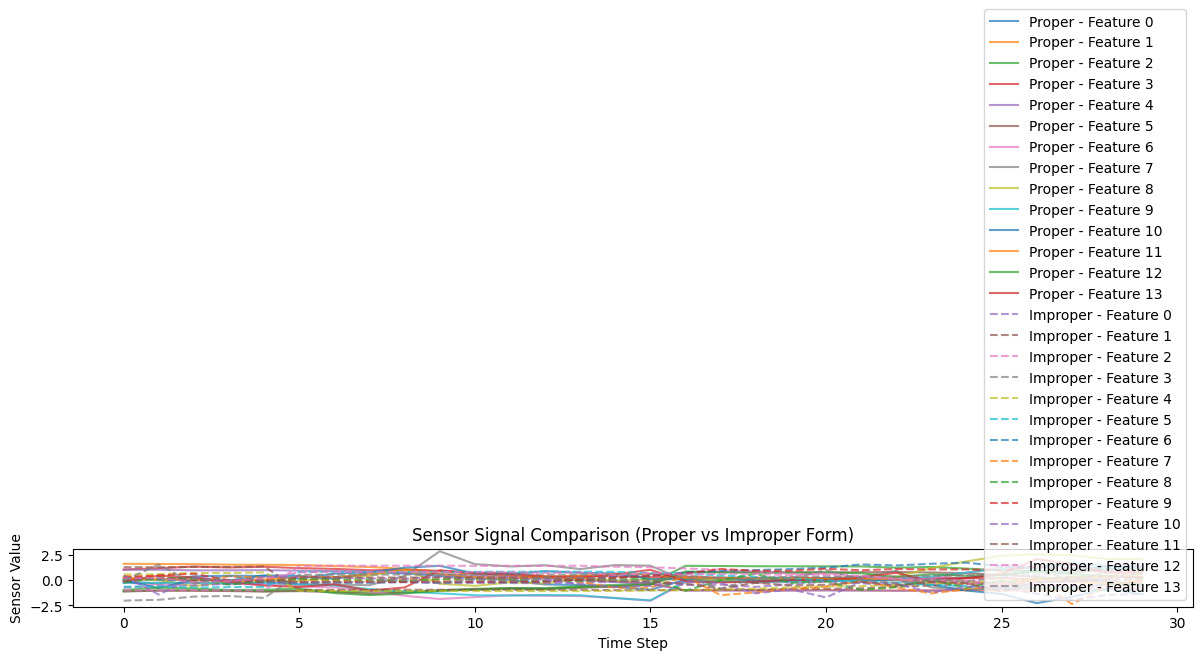

In [34]:
# Example: Plot a few IMU signals from a sample
import matplotlib.pyplot as plt

# Pick a sample from class 0 (proper form) and 1 (improper form)
sample_proper = X_test[y_test == 0][0]
sample_improper = X_test[y_test == 1][0]

plt.figure(figsize=(12, 4))
for i in range(sample_proper.shape[-1]):  # Assuming shape = (timesteps, features)
    plt.plot(sample_proper[:, i], label=f'Proper - Feature {i}', alpha=0.7)

for i in range(sample_improper.shape[-1]):
    plt.plot(sample_improper[:, i], label=f'Improper - Feature {i}', linestyle='--', alpha=0.7)

plt.title("Sensor Signal Comparison (Proper vs Improper Form)")
plt.xlabel("Time Step")
plt.ylabel("Sensor Value")
plt.legend()
plt.tight_layout()
plt.show()


In [38]:
import numpy as np

def create_sequences(df, window_size=50, step_size=10):
    X, y = [], []
    features = df.drop("label", axis=1).values
    labels = df["label"].values

    for start in range(0, len(df) - window_size, step_size):
        end = start + window_size
        window = features[start:end]
        label = labels[end - 1]  # label at the end of the window

        X.append(window)
        y.append(label)

    return np.array(X), np.array(y)

X_seq, y_seq = create_sequences(X_scaled_df, window_size=50, step_size=10)

print("X shape:", X_seq.shape)
print("y shape:", y_seq.shape)


X shape: (199, 50, 14)
y shape: (199,)


In [42]:
# Export the trained model
model.save("posture_lstm_model.h5")
print("✅ Model saved as 'posture_lstm_model.h5'")


✅ Model saved as 'posture_lstm_model.h5'


In [44]:
import numpy as np
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("posture_lstm_model.h5")

# Simulate live data (e.g., most recent 50 timesteps of 14 features)
# Replace this with real data from ESP32
live_input = np.random.rand(1, 50, 14)  # Shape: (1, 50, 14)

# Make prediction
pred = model.predict(live_input)
label = int(pred > 0.5)
print("🧍 Proper Form" if label == 1 else "⚠️ Improper Form")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step
⚠️ Improper Form


<ipython-input-44-b20f99b843b3>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = int(pred > 0.5)
